In [1]:
from sunspots import *

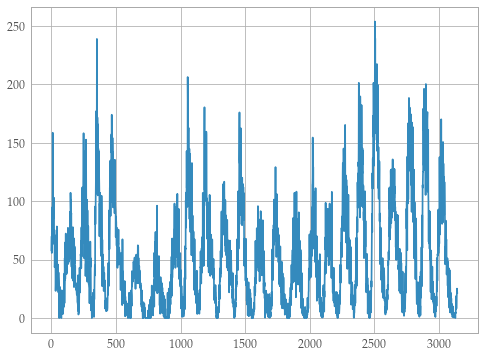

In [4]:
plt.plot(data)

In [2]:
(f)%timeit fft = np.fft.rfft(data)

108 µs ± 1.51 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
%timeit dft = DFT(data)

715 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


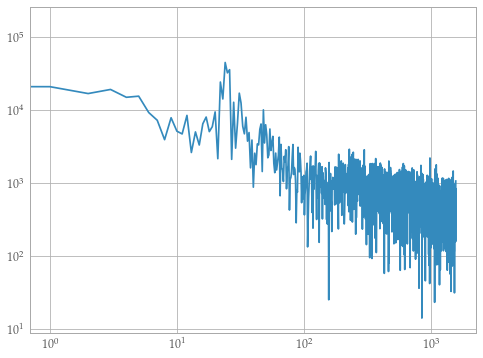

In [8]:
ft = DFT(data)
# the result for the fft is the same

plt.loglog(abs(ft))

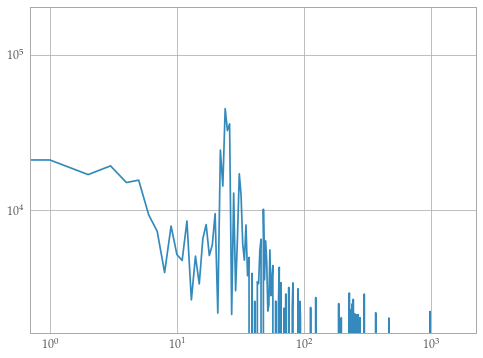

In [48]:
threshold = 2e3
dnft = np.where(abs(ft)>threshold, ft, 0)
plt.loglog(abs(dnft))

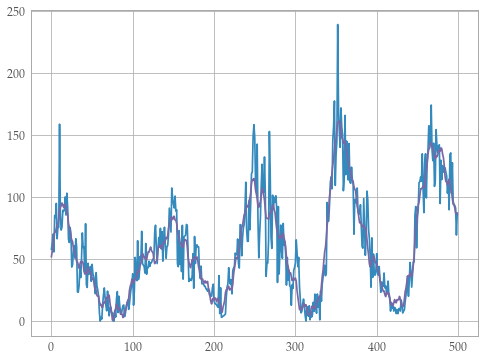

In [49]:
denoised_data = np.fft.irfft(dnft)
plt.plot(data[:500])
plt.plot(denoised_data[:500])

The main frequency is 24.50+-1.91
This corresponds to a period of 128.31 months, or 10.69 years.


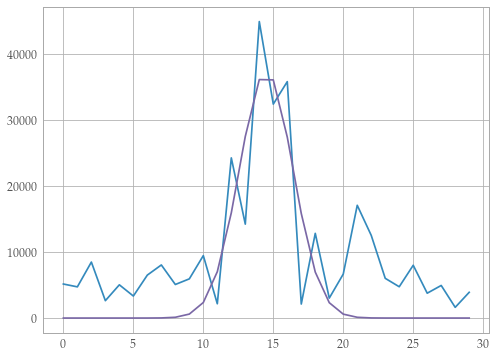

In [65]:
from scipy.optimize import curve_fit
from scipy.stats import norm
gauss = lambda x, c, m, s : c*norm.pdf(x, loc=m, scale=s)

ind_min = 10
ind_max = 40
xs = np.arange(ind_min, ind_max)

peak_data = abs(ft[ind_min:ind_max])
plt.plot(peak_data)

popt, pcov = curve_fit(gauss, xs, peak_data, p0=[30000., 25., 5.])
plt.plot(xs-ind_min, gauss(xs, *popt))
print(f'The main frequency is {popt[1]:.2f}+-{popt[2]:.2f}')
N= len(data)
print(f'This corresponds to a period of {N/popt[1]:.2f} months, or {N/popt[1]/12.:.2f} years.')

In [63]:
N/popt[1] / 12

10.692482882214145